In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fix outliers

In [3]:
pow_file = pd.read_csv('nj1101_0103.csv', header=0, index_col=0)
# print(pow_file.head(5))
pow_max = pow_file.values[:64, :].astype('float')

In [4]:
pow_max[0,99]

5.0

In [7]:
new_pow = pow_max.copy()
for i in range(0, 64):
    new_pow[i,1:95] = np.convolve(pow_max[i,:96], np.ones(3)/3, mode='same')[1:95]

new_pow2= new_pow.copy()
for i in range(96):
    new_pow2[1:63,i] = np.convolve(new_pow[:,i], np.ones(3)/3, mode='same')[1:63]
 
new_pow3= new_pow2.copy()
for i in range(64):
    new_pow3[i, 96] = np.mean(new_pow3[i, 0:96])  
    new_pow3[i, 97] = np.max(new_pow3[i, 0:96])  
    new_pow3[i, 98] = np.min(new_pow3[i, 0:96])  
    
clear_data = pd.DataFrame(new_pow3).to_csv('clear_nj.csv')
clear_data

### Other Ops

In [3]:
def datamap(data, index):
    seq = np.array([])
    for i in range(pow_max.shape[0]):
        seq = np.concatenate((seq, pow_max[i,:]), axis=0)
    
    
    total_x = []
    total_y = []    
    for i in range(5472):
        pow_index = []
        for ele in range(len(index)):
            pow_index.append(seq[-(i+ele)])
        # total_index = zip(pow_index)    
        total_x.append(pow_index)
        total_y.append(seq[-i]) 
        
    return total_x, total_y

In [73]:
seq = np.array([])
for i in range(pow_max.shape[0]):
    seq = np.concatenate((seq, pow_max[i,:]), axis=0)
    
    
total_x = []
total_y = []    
for i in range(5472):
    pow_index = []
    for ele in range(len(index)):
        pow_index.append(seq[-(i+ele)])
    # total_index = zip(pow_index)    
    total_x.append(pow_index)
    total_y.append(seq[-i])

In [75]:
print(total_x[0], total_y[0])

[1392.110962, 1837.034058, 1899.94104, 1973.264038, 1984.092041, 2061.639893, 2192.183105, 2221.470947, 2326.375, 2388.556885, 2372.52002, 2459.87793, 2488.9021, 2514.946045, 2556.834961, 2541.98291, 2627.790039, 2589.741943, 2606.896973, 2594.410889, 2584.681885, 2562.351074, 2590.029053, 2608.346924, 2620.779053, 2609.785889, 2544.10791, 2573.979004, 2520.799072, 2466.812988, 2447.044922, 2413.579102, 2405.363037, 2441.894043, 2442.701904, 2428.662109, 2432.946045, 2405.736084, 2362.75708, 2401.323975, 2371.410889, 2366.103027, 2445.762939, 2351.575928, 2401.926025, 2376.135986, 2397.147949, 2324.535889, 2344.437012, 2425.074951, 2480.36499, 2564.64502, 2604.423096, 2566.861084, 2547.4729, 2511.674072, 2530.938965, 2483.154053, 2447.903076, 2406.208984, 2318.988037, 2331.293945, 2275.528076, 2205.612061, 2054.673096, 1958.972046, 1807.602051, 1797.302002, 1783.062988, 1760.926025, 1724.892944, 1664.19104, 1587.708008, 1549.514038, 1522.07605, 1525.797974, 1566.55896, 1500.52002, 1557

In [ ]:
total_x

In [54]:
seq.shape

(6144,)

In [55]:
64*96

6144

In [39]:
pow_max.shape

(64, 96)

In [40]:
pow_max

array([[1392.110962, 1438.94397 , 1463.214966, ..., 1614.831055,
        1572.499023, 1501.415039],
       [1456.714966, 1447.839966, 1419.828003, ..., 1570.209961,
        1475.81604 , 1537.519043],
       [1421.651978, 1472.944946, 1383.19104 , ..., 1509.573975,
        1417.925049, 1427.245972],
       ...,
       [1726.363037, 1680.969971, 1695.189941, ..., 1779.551025,
        1729.279053, 1649.515991],
       [1616.141968, 1658.688965, 1641.134033, ..., 1861.652954,
        1834.80603 , 1781.677979],
       [1710.194946, 1710.097046, 1653.128052, ..., 1973.264038,
        1899.94104 , 1837.034058]])

In [61]:
a = [1,2,3,2,1,9,3]
b = np.convolve(a, np.ones(3)/3, mode='same')

In [62]:
b

array([1.        , 2.        , 2.33333333, 2.        , 4.        ,
       4.33333333, 4.        ])

In [5]:
new_pow2.shape

(65, 96)

In [29]:
corr_list=[]
for i in range(1, 48):
    day1 = pow_max[0,:-i]
    day2 = pow_max[0,i:]
    corr_list.append(np.corrcoef(day1,day2)[0,1]) # 选小时

In [41]:
pow_max[-64,:]

array([1392.110962, 1438.94397 , 1463.214966, 1366.860962, 1402.061035,
       1349.322021, 1407.417969, 1387.376953, 1340.629028, 1331.873047,
       1334.36499 , 1294.81897 , 1372.651001, 1323.767944, 1322.432983,
       1293.891968, 1288.024048, 1307.677002, 1302.063965, 1306.782959,
       1344.057007, 1296.373047, 1378.277954, 1410.162964, 1412.991943,
       1461.343994, 1464.130981, 1472.597046, 1468.777954, 1504.185059,
       1515.714966, 1561.910034, 1635.717041, 1676.006958, 1701.636963,
       1779.754028, 1781.14502 , 1833.843018, 1843.541016, 1869.527954,
       1871.224976, 1916.865967, 1914.363037, 1965.959961, 1947.370972,
       1902.109009, 1837.982056, 1764.760986, 1768.720947, 1759.05896 ,
       1779.80896 , 1795.682983, 1789.448975, 1829.927002, 1809.918945,
       1806.05896 , 1819.437988, 1823.551025, 1821.771973, 1802.046997,
       1802.176025, 1820.186035, 1843.779053, 1872.290039, 1876.259033,
       1892.019043, 1876.927002, 1911.027954, 1922.125   , 1966.

In [5]:
avg_corr = []
for i in range(1, 58):
    current = pow_max[-i,:]
    previous = np.concatenate((pow_max[-i,:], pow_max[-(i+1),:],pow_max[-(i+2),:],pow_max[-(i+3),:],pow_max[-(i+4),:],pow_max[-(i+5),:],pow_max[-(i+6),:],pow_max[-(i+7),:]), axis=0)
    corr_list = []
    for n in range(672):
        corr = np.corrcoef(current, previous[n:n+96])[0,1]
        # print(corr)
        corr_list.append(corr)
    
    avg_corr.append(corr_list)
    avg_df = pd.DataFrame(avg_corr).values

avg = np.mean(avg_df, axis = 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 103 and the array at index 1 has size 96

In [46]:
avg

array([ 1.        ,  0.98575701,  0.97174898,  0.94846353,  0.92075595,
        0.88659398,  0.84865945,  0.80723388,  0.76220496,  0.71351749,
        0.66227724,  0.60762726,  0.55080966,  0.49273324,  0.43375074,
        0.37418502,  0.31464478,  0.25543544,  0.19652835,  0.13764281,
        0.0807527 ,  0.02526921, -0.02712716, -0.07765945, -0.12471155,
       -0.17020922, -0.21334112, -0.25614626, -0.29731741, -0.33710115,
       -0.37490948, -0.41123028, -0.44530862, -0.477485  , -0.50736112,
       -0.53558462, -0.56129239, -0.58514873, -0.60632426, -0.62558463,
       -0.64138452, -0.65465572, -0.66592987, -0.67539594, -0.6832364 ,
       -0.68943696, -0.69447968, -0.6971574 , -0.69787379, -0.69658557,
       -0.69317026, -0.6879955 , -0.68108237, -0.67296689, -0.66314463,
       -0.65159625, -0.63785447, -0.62197292, -0.60283623, -0.58183227,
       -0.55806306, -0.53309617, -0.50540034, -0.47603589, -0.44454824,
       -0.41152285, -0.3765616 , -0.33971335, -0.30159629, -0.26

In [43]:
96*8

768

In [22]:
current.shape

(96,)

In [23]:
previous.shape  

(864,)

In [1]:
corr_list = []
for i in range(768):
    corr = np.corrcoef(current, previous[i:i+93])[0,1]
    # print(corr)
    corr_list.append(corr)

NameError: name 'np' is not defined

In [25]:
len(corr_list)

768

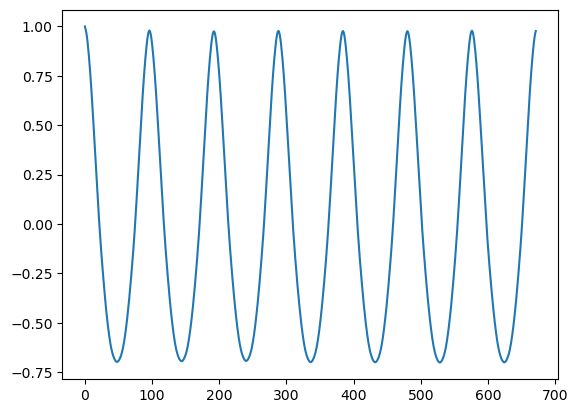

In [47]:
plt.plot(avg)

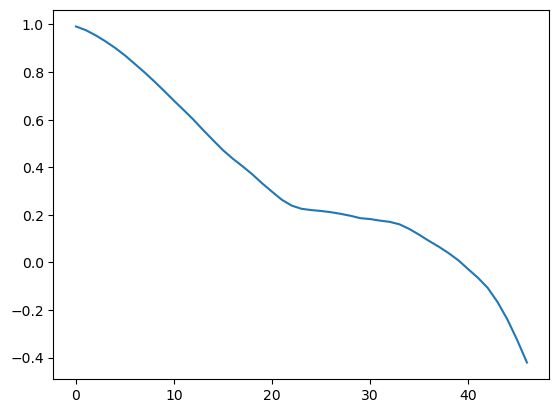

In [30]:
plt.plot(corr_list)

In [27]:
corr_list

[array([[1.        , 0.99164623],
        [0.99164623, 1.        ]]),
 array([[1.        , 0.97614887],
        [0.97614887, 1.        ]]),
 array([[1.        , 0.95455428],
        [0.95455428, 1.        ]]),
 array([[1.       , 0.9293743],
        [0.9293743, 1.       ]]),
 array([[1.        , 0.90130178],
        [0.90130178, 1.        ]]),
 array([[1.        , 0.86974932],
        [0.86974932, 1.        ]]),
 array([[1.        , 0.83426199],
        [0.83426199, 1.        ]]),
 array([[1.        , 0.79852255],
        [0.79852255, 1.        ]]),
 array([[1.        , 0.76023577],
        [0.76023577, 1.        ]]),
 array([[1.        , 0.72047132],
        [0.72047132, 1.        ]]),
 array([[1.        , 0.67935027],
        [0.67935027, 1.        ]]),
 array([[1.        , 0.63981349],
        [0.63981349, 1.        ]]),
 array([[1.        , 0.59914623],
        [0.59914623, 1.        ]]),
 array([[1.        , 0.55516489],
        [0.55516489, 1.        ]]),
 array([[1.        , 0.5

In [56]:
index=np.array(np.argwhere(np.array(avg)>0.75))
ind = pd.DataFrame(index).to_csv('index.csv')

In [50]:
index.shape

(119, 1)

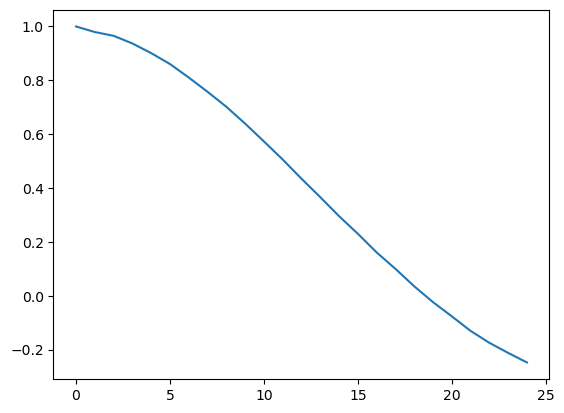

In [33]:
plt.plot(corr_list[:25])

In [34]:
corr_list[:20]

[1.0,
 0.9793633238755547,
 0.965348712174908,
 0.9369336322377456,
 0.901097729698365,
 0.8605520065149085,
 0.8104609761325821,
 0.7574574674418025,
 0.7018514510526066,
 0.6393533983557961,
 0.5731907587329789,
 0.505972967753335,
 0.4346886455361811,
 0.3661276218331403,
 0.29560856217440373,
 0.23024634486508697,
 0.16105406168301956,
 0.09998666452961402,
 0.035174272901364344,
 -0.023662679765144246]

In [21]:
current.shape

(96,)

In [27]:
previous.shape

(864,)

In [28]:
array = np.concatenate((pow_max[0,:],pow_max[1,:],pow_max[2,:],pow_max[3,:],pow_max[4,:],pow_max[5,:],pow_max[6,:]), axis=0)

In [29]:
array.shape

(672,)

In [30]:
def autocorrelation(x,lags):
#计算lags阶以内的自相关系数，返回lags个值，分别计算序列均值，标准差
	n = len(x)
	x = np.array(x)
	result = [np.correlate(x[i:]-x[i:].mean(),x[:n-i]-x[:n-i].mean())[0]\
		/(x[i:].std()*x[:n-i].std()*(n-i)) for i in range(1,lags+1)]
	return result

In [24]:
correlation = autocorrelation(current, 95)

C:\Users\26673\AppData\Local\Temp\ipykernel_40536\3366579481.py:5: RuntimeWarning: invalid value encountered in double_scalars
  result = [np.correlate(x[i:]-x[i:].mean(),x[:n-i]-x[:n-i].mean())[0]\


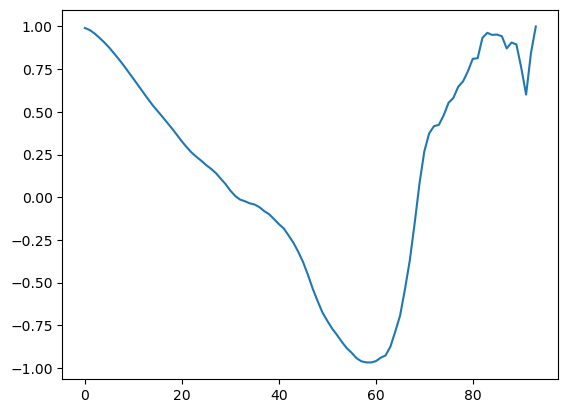

In [25]:
plt.plot(correlation)

In [8]:
correlation = np.corrcoef(array, array)

In [9]:
correlation

array([[1., 1.],
       [1., 1.]])

In [45]:
corr.shape

(124, 124)

In [51]:
corr_hour[:,:24]

array([[1.        , 0.94472428, 0.91511331, ..., 0.7985612 , 0.76236506,
        0.78421654],
       [0.94472428, 1.        , 0.90175726, ..., 0.79662008, 0.77072339,
        0.80409149],
       [0.91511331, 0.90175726, 1.        , ..., 0.76755011, 0.78913953,
        0.74120109],
       ...,
       [0.79197914, 0.77742641, 0.76282925, ..., 0.74752566, 0.71248657,
        0.68415203],
       [0.74409106, 0.72551506, 0.73477122, ..., 0.70936579, 0.70435713,
        0.67706637],
       [0.75270693, 0.73567377, 0.72896193, ..., 0.75227752, 0.68848357,
        0.67148312]])

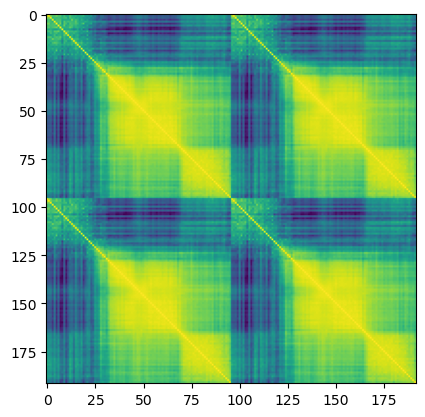

In [48]:
plt.imshow(corr_hour)

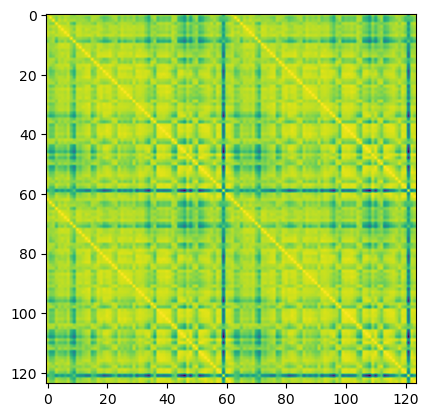

In [40]:
for i in range 

In [ ]:
np.mean(corr, )

In [24]:

import numpy as np
 
Array1 = [[1, 2, 3], [4, 5, 6]]
Array2 = [[11, 25, 346], [734, 48, 49]]
Mat1 = np.array(pow_max)
Mat2 = np.array(pow_max)
# correlation = np.corrcoef(Mat1, Mat2)
# print("矩阵1=\n", Mat1)
# print("矩阵2=\n", Mat2)
# print("相关系数矩阵=\n", correlation)

In [25]:
Mat1

array([[1392.110962, 1438.94397, 1463.214966, ..., 1614.831055,
        1572.499023, 1501.415039],
       [1456.714966, 1447.839966, 1419.828003, ..., 1570.209961,
        1475.81604, 1537.519043],
       [1421.651978, 1472.944946, 1383.19104, ..., 1509.573975,
        1417.925049, 1427.245972],
       ...,
       [1726.363037, 1680.969971, 1695.189941, ..., 1779.551025,
        1729.279053, 1649.515991],
       [1616.141968, 1658.688965, 1641.134033, ..., 1861.652954,
        1834.80603, 1781.677979],
       [1710.194946, 1710.097046, 1653.128052, ..., 1973.264038,
        1899.94104, 1837.034058]], dtype=object)